<a href="https://colab.research.google.com/github/sandeep-006/Customer_lifetime_value_pred/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [3]:

# 1. Load the dataset
# If you are running this in Colab, make sure to upload the file first
df = pd.read_csv('dataset_with_impurities.csv')

# --- SECTION 1: BASIC INSPECTION ---
print("### Dataset Info ###")
print(df.info())


### Dataset Info ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_id        6979 non-null   object 
 1   transaction_date      6972 non-null   object 
 2   store_id              7000 non-null   object 
 3   store_name            7000 non-null   object 
 4   store_city            7000 non-null   object 
 5   store_region          7000 non-null   object 
 6   customer_id           6985 non-null   object 
 7   first_name            7000 non-null   object 
 8   email                 7000 non-null   object 
 9   customer_phone        7000 non-null   int64  
 10  loyalty_status        7000 non-null   object 
 11  customer_since        7000 non-null   object 
 12  product_id            6989 non-null   object 
 13  product_name          7000 non-null   object 
 14  product_category      7000 non-null   object 
 15  

In [19]:
total_unique_customers = df['customer_id'].nunique()
total_unique_customers

200

--- Data Time Range ---
Earliest Transaction: 2023-01-01 04:11:32
Latest Transaction:   2025-09-18 00:00:00
Total Time Span:      990 days 19:48:28
Rows with Invalid/Missing Dates: 28


/tmp/ipython-input-4018171711.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('transaction_date').resample('M').size().plot(kind='line', figsize=(10,5))


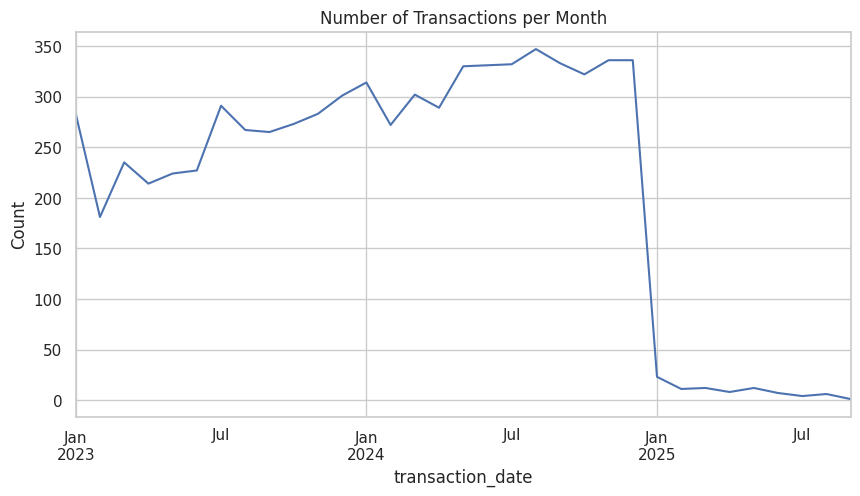

In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/dataset_with_impurities.csv')

# 1. Convert to datetime (errors='coerce' turns "impurities" or text into NaT/null)
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

# 2. Calculate the range
start_date = df['transaction_date'].min()
end_date = df['transaction_date'].max()
duration = end_date - start_date

# 3. Check for invalid dates
invalid_dates_count = df['transaction_date'].isna().sum()

print(f"--- Data Time Range ---")
print(f"Earliest Transaction: {start_date}")
print(f"Latest Transaction:   {end_date}")
print(f"Total Time Span:      {duration}")
print(f"Rows with Invalid/Missing Dates: {invalid_dates_count}")

# Optional: Visualize transactions over time to see gaps
import matplotlib.pyplot as plt
df.set_index('transaction_date').resample('M').size().plot(kind='line', figsize=(10,5))
plt.title('Number of Transactions per Month')
plt.ylabel('Count')
plt.show()

In [4]:

print("\n### Statistical Summary (Numerical) ###")
display(df.describe())



### Statistical Summary (Numerical) ###


,customer_phone,unit_price,quantity,discount_percentage,total_price,discount_amount,final_amount,month,day_of_week,customer_tenure_days
count,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,8.516580e+09,810.614143,2.980143,4.778714,2439.087143,120.091300,2328.440129,6.735143,2.976857,542.479143
std,8.628151e+08,552.305661,1.466794,9.009387,2184.377793,307.876099,2084.788937,3.435378,2.008350,340.572579
min,7.000770e+09,-1500.000000,-5.000000,0.000000,-7500.000000,0.000000,35.000000,1.000000,0.000000,0.000000
25%,7.784754e+09,350.000000,2.000000,0.000000,897.000000,0.000000,799.000000,4.000000,1.000000,263.000000
50%,8.549228e+09,799.000000,3.000000,0.000000,1750.000000,0.000000,1596.000000,7.000000,3.000000,506.000000
75%,9.257510e+09,1200.000000,4.000000,7.000000,3600.000000,68.107500,3596.000000,10.000000,5.000000,785.000000
max,9.998637e+09,1999.000000,5.000000,40.000000,9995.000000,3000.000000,9995.000000,12.000000,6.000000,1672.000000


In [5]:

print("\n### Missing Values Count ###")
print(df.isnull().sum())



### Missing Values Count ###
transaction_id            21
transaction_date          28
store_id                   0
store_name                 0
store_city                 0
store_region               0
customer_id               15
first_name                 0
email                      0
customer_phone             0
loyalty_status             0
customer_since             0
product_id                11
product_name               0
product_category           0
unit_price                 0
quantity                   0
promotion_id            4918
promotion_name          4918
discount_percentage        0
total_price                0
discount_amount            0
final_amount               0
month                      0
day_of_week                0
customer_tenure_days       0
dtype: int64


In [6]:

# --- SECTION 2: IMPURITY DETECTION (Validation) ---

print("\n--- Running Impurity Diagnostics ---")

# 1. Calculation Errors (Total Price check)
df['calc_total'] = df['unit_price'] * df['quantity']
calc_errors = df[df['total_price'] != df['calc_total']]
print(f"Rows with Calculation Errors: {len(calc_errors)}")



--- Running Impurity Diagnostics ---
Rows with Calculation Errors: 134


In [7]:

# 2. Negative Value Errors
neg_errors = df[(df['quantity'] < 0) | (df['unit_price'] < 0) | (df['total_price'] < 0)]
print(f"Rows with Negative Values: {len(neg_errors)}")


Rows with Negative Values: 60


In [8]:

# 3. Temporal Errors (Transaction before joining)
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['customer_since'] = pd.to_datetime(df['customer_since'])
temporal_errors = df[df['transaction_date'] < df['customer_since']]
print(f"Rows with Temporal Errors (Txn < Join Date): {len(temporal_errors)}")


Rows with Temporal Errors (Txn < Join Date): 66


In [9]:

# 4. Email Format Errors
def is_valid_email(email):
    if pd.isnull(email): return False
    return bool(re.match(r"[^@]+@[^@]+\.[^@]+", str(email)))

email_errors = df[~df['email'].apply(is_valid_email)]
print(f"Rows with Invalid Email Formats: {len(email_errors)}")


Rows with Invalid Email Formats: 75


Text(0.5, 1.0, 'Distribution of Final Transaction Amount')

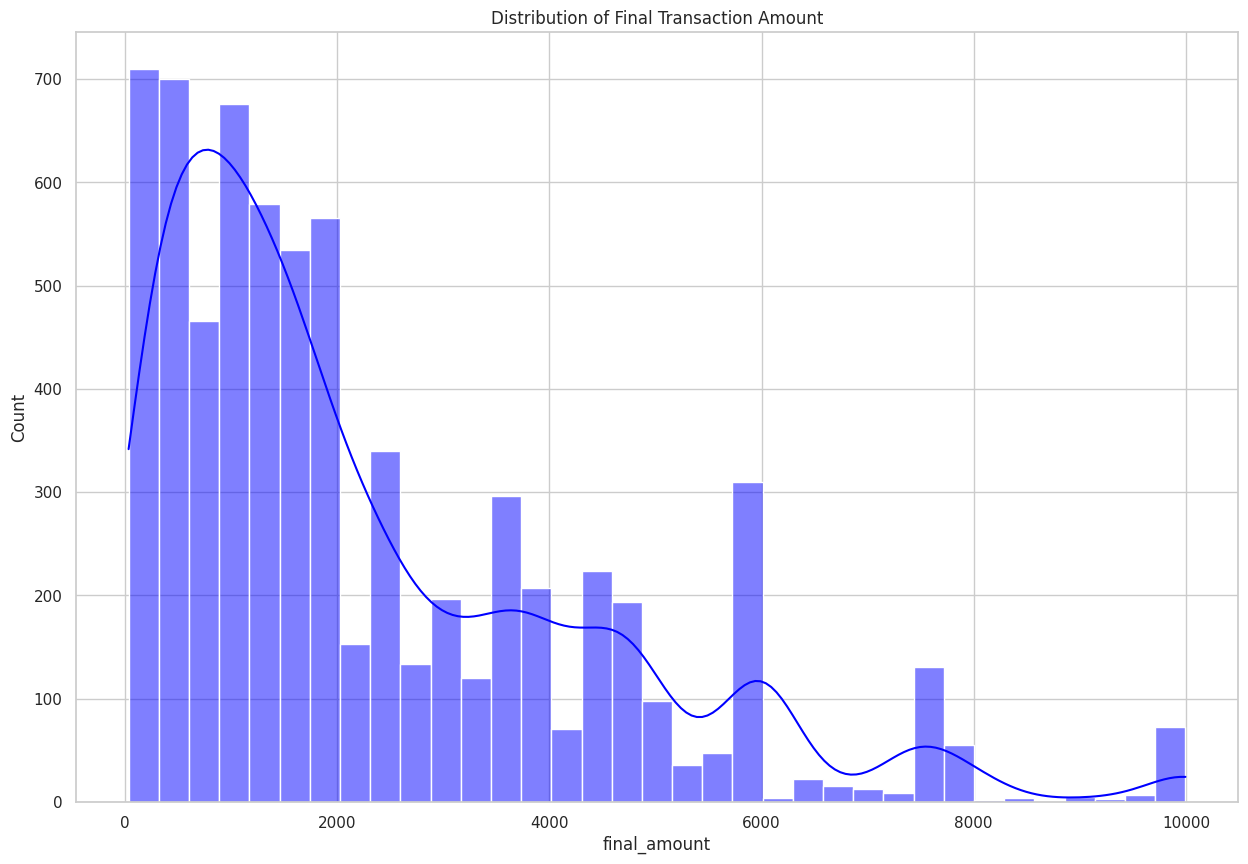

In [10]:

# --- SECTION 3: VISUALIZATIONS ---

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# A. Distribution of Final Amounts
# plt.subplot(2, 2, 1)
sns.histplot(df['final_amount'].dropna(), kde=True, color='blue')
plt.title('Distribution of Final Transaction Amount')


/tmp/ipython-input-174739708.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='store_region', palette='viridis')


Text(0.5, 1.0, 'Transaction Count by Store Region')

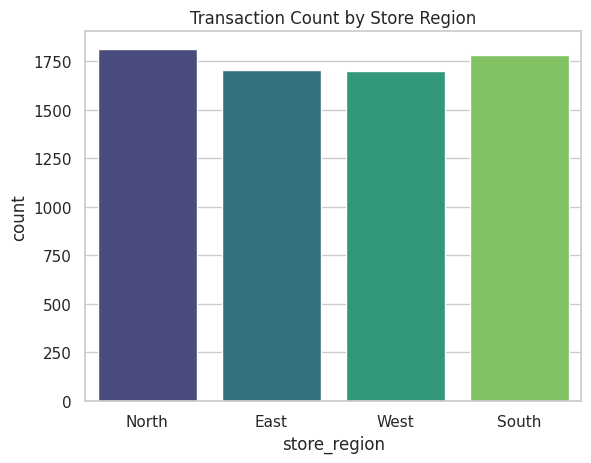

In [11]:

# B. Transactions by Region
# plt.subplot(2, 2, 2)
sns.countplot(data=df, x='store_region', palette='viridis')
plt.title('Transaction Count by Store Region')


Text(0.5, 1.0, 'Feature Correlation Heatmap')

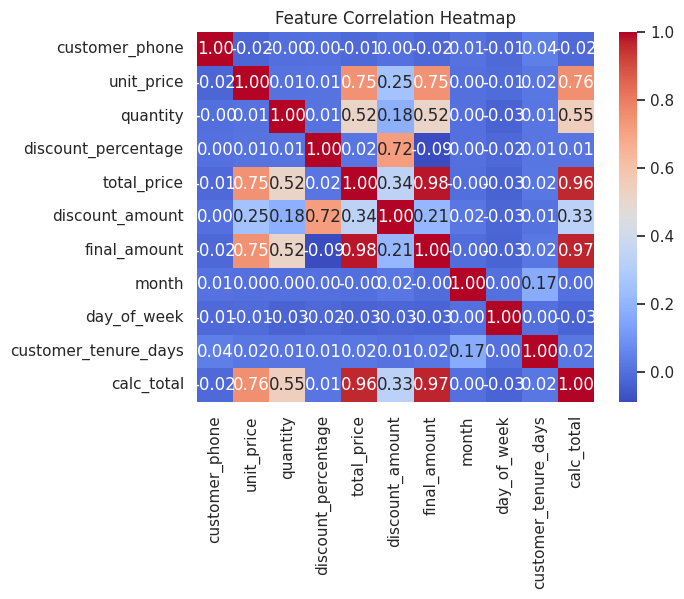

In [13]:

# C. Correlation Heatmap
# plt.subplot(2, 2, 3)
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')


/tmp/ipython-input-4195638516.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y='final_amount', estimator='sum', ci=None)


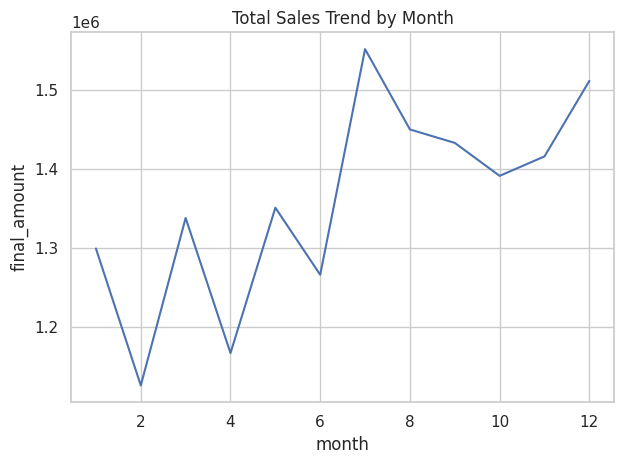

In [15]:

# D. Sales Trend by Month
# plt.subplot(2, 2, 4)
sns.lineplot(data=df, x='month', y='final_amount', estimator='sum', ci=None)
plt.title('Total Sales Trend by Month')

plt.tight_layout()
plt.show()


In [16]:

# --- SECTION 4: DATA SEGREGATION LOGIC ---
# This is a sneak peek of how you can separate the data
is_clean = (
    df['transaction_id'].notnull() &
    df['customer_id'].notnull() &
    (df['total_price'] == df['calc_total']) &
    (df['quantity'] > 0) &
    (df['unit_price'] > 0) &
    (df['transaction_date'] >= df['customer_since']) &
    df['email'].apply(is_valid_email)
)

clean_df = df[is_clean].copy()
error_df = df[~is_clean].copy()

print(f"\nFinal Segregation Results:")
print(f"Clean Records: {len(clean_df)}")
print(f"Impure Records (Error Table): {len(error_df)}")


Final Segregation Results:
Clean Records: 6661
Impure Records (Error Table): 339
